We will use logistic regression to
recognize handwritten digits (from 0 to 9). Automated handwritten digit
recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This
exercise will show you how the methods you’ve learned can be used for this
classification task.

You are given a data set in ex3data1.mat that contains 5000 training exam-
ples of handwritten digits.The .mat format means that that the data has
been saved in a native Octave/MATLAB matrix format, instead of a text
(ASCII) format like a csv-file.
These matrices can be read directly into your
program by using the loadmat function from scipy.io

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

In [2]:
data=loadmat("data/ex3data1.mat")

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.

In [4]:
X=data['X']
X=np.hstack((np.ones((len(X),1)),X))

In [5]:
X.shape

(5000, 401)

In [6]:
Y=data['y']

In [7]:
Y.shape

(5000, 1)

To make things more compatible, there is no zero index, they have mapped
the digit zero to the value ten. Therefore, we are setting 10 back to 0


In [8]:
Y[Y==10]=0

In [9]:
X[:5,:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [10]:
Y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

# Visualization The Data

the code randomly selects selects 100 rows from X and maps each row to a 20 pixel by
20 pixel grayscale image and displays the images together

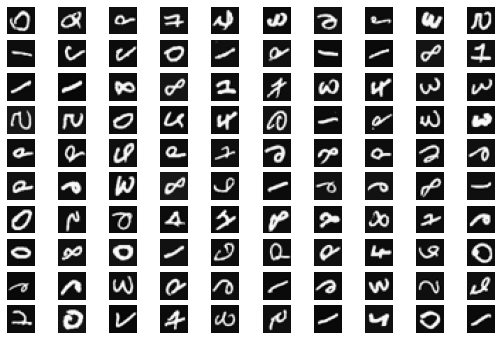

In [11]:
plt.figure(figsize=(9,6))
count=0
for i in range(10):
    for j in range(10):
        count+=1
        n=np.random.randint(0,5000,1)
        plt.subplot(10,10,count)
        plt.imshow(data['X'][n].reshape((20,20)),cmap="Greys_r")
        plt.axis("off");

# Vectorizing Logistic Regression

We will be using multiple one-vs-all logistic regression models to build a
multi-class classifier. Since there are 10 classes, you will need to train 10
separate logistic regression classifiers. To make this training efficient, it is
important to ensure that your code is well vectorized. In this section, you
will implement a vectorized version of logistic regression that does not employ
any for loops.

# Sigmoid Function

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Vectorizing the cost function

In [13]:
def LrCostFunction(theta,X,Y,lamb):
    m=Y.shape[0]
    theta=theta.reshape((401,1))
    
    J=(-1/m)*(np.dot(Y.T,np.log(sigmoid(np.dot(X,theta)))) + np.dot(1-Y.T,np.log(sigmoid(1-np.dot(X,theta))))) + (0.5*lamb/m)*(np.dot(theta.T,theta)-theta[0,0]**2)
    J=np.ndarray.flatten(J)
    return J
    

# Vectorizing the gradient function

In [14]:
def LrGradientFunction(theta,X,Y,lamb):
    m=Y.shape[0]
    theta=theta.reshape((401,1))
    gradient=(1/m)*(np.dot(X.T,sigmoid(np.dot(X,theta)) - Y)) + (lamb/m)*theta
    gradient[0,0]=gradient[0,0]-(lamb/m)*theta[0,0]
    gradient=np.ndarray.flatten(gradient)
    return gradient

# One-vs-all Classification

Training all classifiers

In [15]:
all_theta=np.zeros((10,401))


for k in range(0,10):
    
    y_new=np.copy(Y)
    y_new[Y==k]=1
    y_new[Y!=k]=0
    Theta=fmin_bfgs(LrCostFunction,x0=np.array([0 for i in range(401)]),fprime=LrGradientFunction,args=(X,y_new,1))
    all_theta[k]=Theta
    

         Current function value: 0.023247
         Iterations: 36
         Function evaluations: 95
         Gradient evaluations: 84
         Current function value: 0.034355
         Iterations: 11
         Function evaluations: 72
         Gradient evaluations: 61
         Current function value: 0.068792
         Iterations: 25
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 0.069827
         Iterations: 27
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 0.051277
         Iterations: 35
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 0.078434
         Iterations: 28
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 0.034783
         Iterations: 39
         Function evaluations: 110
         Gradient evaluations: 99
         Current function value: 0.061215
         Iterati

# One-vs-all Prediction

In [16]:
predictions=np.dot(X,all_theta.T)

In [17]:
predictions.shape

(5000, 10)

In [18]:
Y_predictions=np.zeros((len(Y),1))
for i in range(len(Y)):
    ind=np.argmax(predictions[i])
    
    Y_predictions[i]=ind

In [19]:
Y_predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [9.],
       [9.],
       [9.]])

# Accuracy

In [21]:
(Y==Y_predictions).sum()/5000*100

90.68

# Thank You